In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [2]:
titanic = fetch_openml(name='titanic', version=1, as_frame=True)
df = titanic.data
df['target'] = titanic.target

   pclass                                             name     sex      age  \
0     1.0                    Allen, Miss. Elisabeth Walton  female  29.0000   
1     1.0                   Allison, Master. Hudson Trevor    male   0.9167   
2     1.0                     Allison, Miss. Helen Loraine  female   2.0000   
3     1.0             Allison, Mr. Hudson Joshua Creighton    male  30.0000   
4     1.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.0000   

   sibsp  parch  ticket      fare    cabin embarked  boat   body  \
0    0.0    0.0   24160  211.3375       B5        S     2    NaN   
1    1.0    2.0  113781  151.5500  C22 C26        S    11    NaN   
2    1.0    2.0  113781  151.5500  C22 C26        S  None    NaN   
3    1.0    2.0  113781  151.5500  C22 C26        S  None  135.0   
4    1.0    2.0  113781  151.5500  C22 C26        S  None    NaN   

                         home.dest target  
0                     St Louis, MO      1  
1  Montreal, PQ / Chestervil

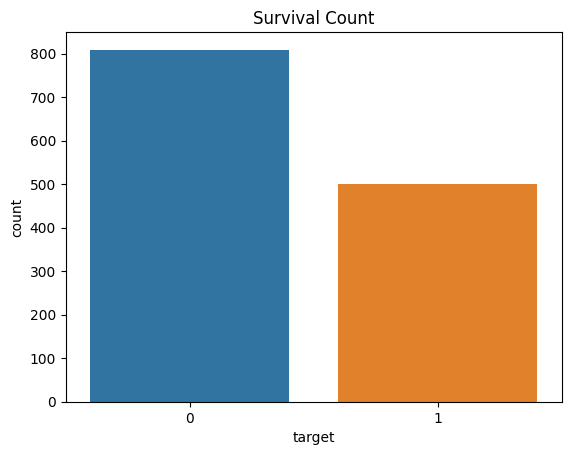

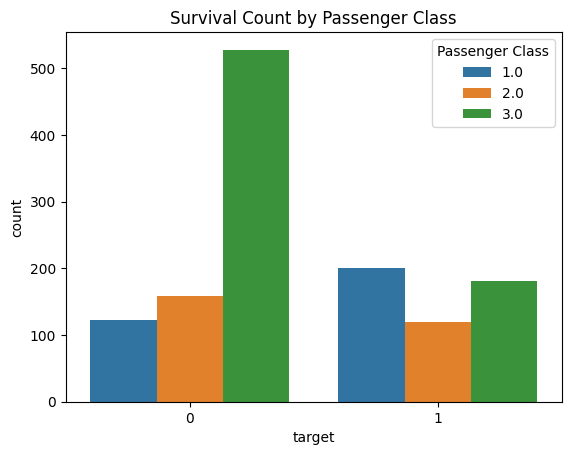

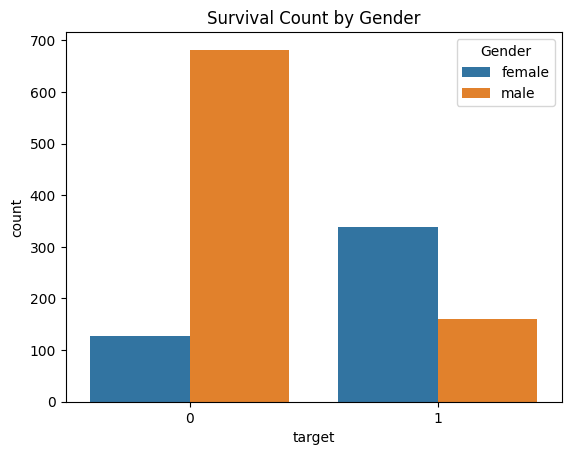

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


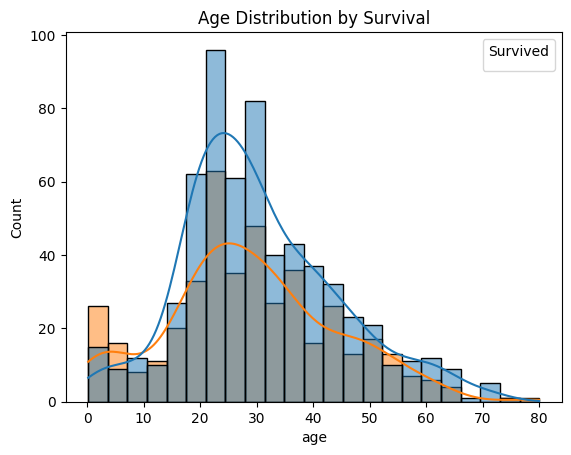

C:\Users\Dhwanil Chauhan\AppData\Local\Temp\ipykernel_26552\1923903392.py:34: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


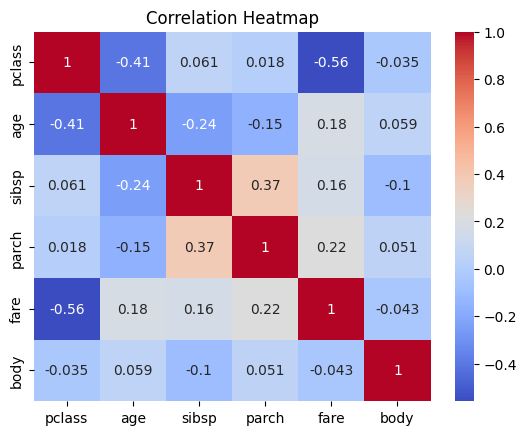

In [3]:
# Display the first few rows of the dataset
print(df.head())

# Get the summary statistics of the dataset
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize the distribution of the target variable
sns.countplot(x='target', data=df)
plt.title('Survival Count')
plt.show()

# Visualize the survival rate based on passenger class
sns.countplot(x='target', hue='pclass', data=df)
plt.title('Survival Count by Passenger Class')
plt.legend(title='Passenger Class')
plt.show()

# Visualize the survival rate based on gender
sns.countplot(x='target', hue='sex', data=df)
plt.title('Survival Count by Gender')
plt.legend(title='Gender')
plt.show()

# Visualize the distribution of ages
sns.histplot(data=df, x='age', hue='target', kde=True)
plt.title('Age Distribution by Survival')
plt.legend(title='Survived')
plt.show()

# Visualize the correlation between variables
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [4]:
df.fillna(df.mean(), inplace=True)  # Fill missing numerical values with mean
df.fillna(df.mode().iloc[0], inplace=True)  # Fill missing categorical values with mode

C:\Users\Dhwanil Chauhan\AppData\Local\Temp\ipykernel_26552\1727156080.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)  # Fill missing numerical values with mean
C:\Users\Dhwanil Chauhan\AppData\Local\Temp\ipykernel_26552\1727156080.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.fillna(df.mode().iloc[0], inplace=True)  # Fill missing categorical values with mode


In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Use OneHotEncoder for multi-category columns and LabelEncoder for binary columns
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
label_encoder = LabelEncoder()

df[categorical_columns] = df[categorical_columns].apply(lambda x: label_encoder.fit_transform(x.astype(str)))

df['sex']= label_encoder.fit_transform(df['sex'])

df['embarked']= label_encoder.fit_transform(df['embarked'])

In [9]:
# Display the first few rows of the dataset
print(df.head())

# Get the summary statistics of the dataset
print(df.describe())

# Check for missing values
print(df.isnull().sum())


   pclass  name  sex      age  sibsp  parch  ticket      fare  cabin  \
0     1.0    21    0  29.0000    0.0    0.0     187  211.3375     43   
1     1.0    23    1   0.9167    1.0    2.0      49  151.5500     79   
2     1.0    24    0   2.0000    1.0    2.0      49  151.5500     79   
3     1.0    25    1  30.0000    1.0    2.0      49  151.5500     79   
4     1.0    26    0  25.0000    1.0    2.0      49  151.5500     79   

   embarked  boat        body  home.dest target  
0         2    11  160.809917        308      1  
1         2     2  160.809917        230      1  
2         2     4  160.809917        230      0  
3         2     4  135.000000        230      0  
4         2     4  160.809917        230      0  
            pclass         name          sex          age        sibsp  \
count  1309.000000  1309.000000  1309.000000  1309.000000  1309.000000   
mean      2.294882   652.689076     0.644003    29.881135     0.498854   
std       0.837836   377.309849     0.478997 

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8969465648854962


c:\Users\Dhwanil Chauhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
